In [74]:
#%pip install "numpy<2.0"

In [75]:
import matplotlib.pyplot as plt

rcParams_dict = {
    # ---------- figure
    'figure.figsize': [8, 6],
    'figure.dpi': 120,
    'figure.facecolor': 'white',
    # ---------- axes
    'axes.grid': True,
    'axes.linewidth': 1.5,
    # ---------- ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.major.size': 8.0,
    'ytick.major.size': 8.0,
    # ---------- lines
    'lines.linewidth': 2.5,
    'lines.markersize': 12,
    # ---------- grid
    'grid.linestyle': ':',
    # ---------- font
    'font.family': 'Times New Roman',
    'mathtext.fontset': 'cm',
    #'mathtext.fontset': 'stix',
    'font.size': 20,
    'axes.labelsize': 26,
    'legend.fontsize': 26,
    'svg.fonttype': 'path',  # Embed characters as paths
    #'svg.fonttype': 'none',  # Assume fonts are installed on the machine
    'pdf.fonttype': 42,  # embed fonts in PDF using type42 (True type)
}

plt.rcParams.update(rcParams_dict)

In [76]:
import ase
print(ase.__version__)


3.26.0b1


In [77]:

from ase.build import bulk
from ase.io import read
from ase.visualize import view
from pymatgen.io.ase import AseAtomsAdaptor

t_atoms = read("CuAu.POSCAR",index=0,format='vasp')
nat = len(t_atoms)
#natot = 16

#target atom energy
from chgnet.model import StructOptimizer
relaxer = StructOptimizer()
struc = AseAtomsAdaptor.get_structure(t_atoms)
result = relaxer.relax(atoms=struc, fmax=0.05, steps=1000)
# ---------- collect energy
t_energy = result['trajectory'].energies[-1]/nat

print(t_atoms)
print(t_energy)
view(t_atoms, viewer='x3d')


CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
      Step     Time          Energy          fmax
FIRE:    0 16:27:30        2.759987        6.950879
FIRE:    1 16:27:30       -1.600883        7.849945
FIRE:    2 16:27:31       -6.990738        7.905299
FIRE:    3 16:27:31      -12.856361        9.145254
FIRE:    4 16:27:32      -18.646240        8.874362
FIRE:    5 16:27:32      -23.593098       10.120871
FIRE:    6 16:27:33      -28.111357       10.777771
FIRE:    7 16:27:34      -32.673813       10.846746
FIRE:    8 16:27:34      -37.247925        9.445419
FIRE:    9 16:27:35      -41.306171        7.577625
FIRE:   10 16:27:35      -44.536285        5.747931
FIRE:   11 16:27:36      -47.044472        4.356887
FIRE:   12 16:27:36      -48.918568        3.159259
FIRE:   13 16:27:36      -50.368267        2.490946
FIRE:   14 16:27:36      -51.498608        1.885109
FIRE:   15 16:27:37      -52.355370        1.378756
FIRE:   16 16:27:37      -52.956158        1.

In [78]:

from dscribe.descriptors import SOAP
import numpy as np
from cryspy.interactive import action
import pickle

path = './data/pkl_data/rslt_data.pkl'
with open(path, 'rb') as f:
    rslt_data = pickle.load(f)

species = ["Cu","Au"]
r_cut = 6.0
n_max = 4
l_max = 2

# Setting up the SOAP descriptor
soap = SOAP(
    species=species,
    periodic=True,
    average="outer",
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)

max_cid = len(rslt_data.E_eV_atom)
energy = []
snum=soap.get_number_of_features()
soap_array = np.empty((0,snum))
for cid in range(max_cid):
    try:
        atoms = action.get_atoms('opt', cid=cid)
    except KeyError:
        print(f"CID {cid} not found, skipping.")
        continue
    
    atoms=action.get_atoms('opt', cid=cid)
    soap_atoms = soap.create(atoms)
    soap_array = np.append(soap_array, np.array([soap_atoms]), axis=0)
    energy.append(rslt_data.E_eV_atom[cid])
soap_atoms = soap.create(t_atoms)
soap_array = np.append(soap_array, np.array([soap_atoms]), axis=0)
energy.append(t_energy)

print(soap_array)
print(snum)
print(soap_array.shape)
print(len(energy))

[[ 7.04536602e-01 -2.49219459e+00  4.39116639e+00 ...  7.04480883e+00
  -1.60181761e+01  4.52891599e+01]
 [ 1.76477417e+00 -5.32545273e+00  1.29831734e+01 ...  1.33778247e+00
   5.33469329e-01  1.00956936e+01]
 [ 2.15425000e+00 -6.22490063e+00  1.61692188e+01 ...  1.94432443e-29
  -2.65877282e-29  8.94555932e-29]
 ...
 [ 1.29971831e+00 -4.00331227e+00  9.43242539e+00 ...  3.75205775e+00
  -9.09722930e+00  3.24147683e+01]
 [ 1.89378849e+00 -5.67433843e+00  1.41230400e+01 ...  1.38466084e+00
   8.75180182e-01  5.57692214e-01]
 [ 2.01197516e+00 -6.46834537e+00  1.32935683e+01 ...  1.46593977e+01
  -3.17074604e+01  7.18665278e+01]]
108
(101, 108)
101


(101, 108)


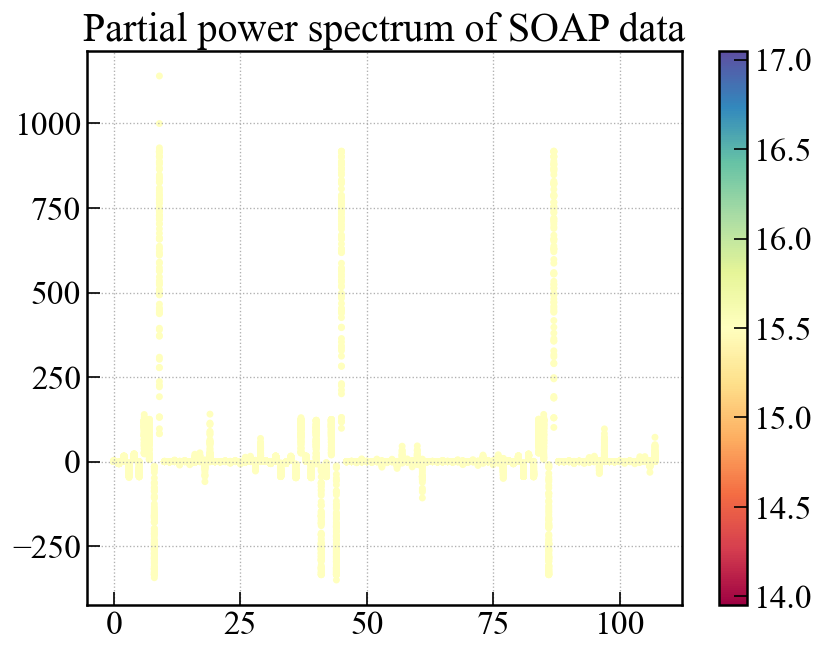

In [73]:

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# space_group_list=[]
# for cid in range(max_cid):
#     if not rslt_data.Spg_num[cid] in space_group_list:
#         space_group_list.append(rslt_data.Spg_num[cid])
# space_group_list = sorted(space_group_list)
# print(len(space_group_list))
# print(space_group_list)

#エネルギーのクリッピング
for cid in range (max_cid+1):
    energy[cid]=max(min(energy[cid],15.5),15)


x,y,c=[],[],[]
for cid in range(max_cid+1):
    x.append(range(snum))
    y.append(soap_array[cid])
    c.append([energy[cid]]*snum)
plt.scatter(x, y, c=c, cmap='Spectral', s=10)
# plt.colorbar(boundaries=np.arange(len(space_group_list)+1)-0.5).set_ticks(np.arange(len(space_group_list)))
# plt.colorbar(ticks=mticker.NullLocator())
plt.colorbar()
plt.title('Partial power spectrum of SOAP data')

print(soap_array.shape)

カラーバーの色が赤色に偏るため、エネルギーの上限を-3.0としてクリッピングしている

/Users/kongkitimanon2024/.pyenv/versions/miniforge3-22.11.1-4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(101, 2)


/Users/kongkitimanon2024/.pyenv/versions/miniforge3-22.11.1-4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Text(0.5, 1.0, 'UMAP display of SOAP data')

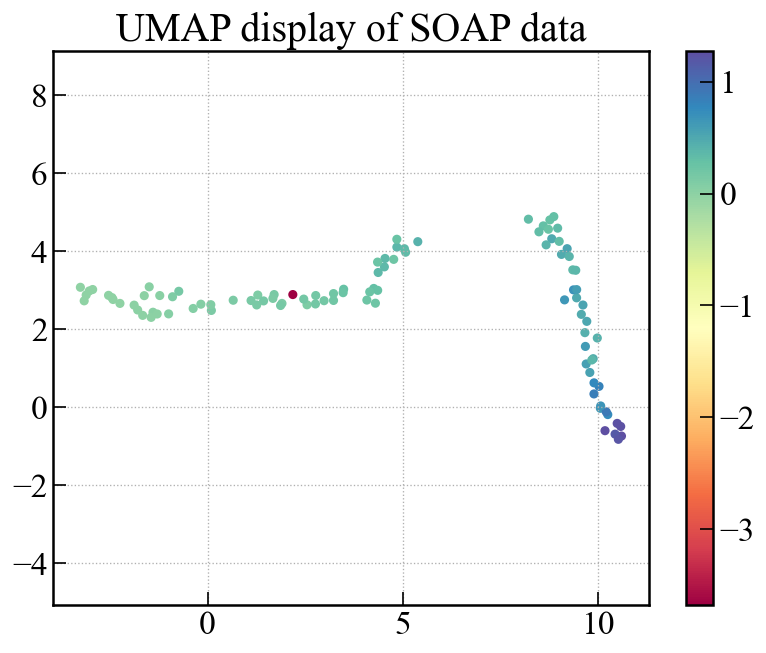

In [79]:
import umap
# umapで2次元に削減
reducer = umap.UMAP()
reducer.fit(soap_array)
embedding = reducer.transform(soap_array)
print(embedding.shape)

plt.scatter(embedding[:, 0], embedding[:, 1], c=energy, cmap='Spectral', s=20)
plt.gca().set_aspect('equal', 'datalim')
# plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# plt.colorbar(ticks=mticker.NullLocator())
plt.colorbar()
plt.title('UMAP display of SOAP data')
# データ分散が最も大きくなる向きに軸(第一主成分)をとり、第一主成分方向の大きさが横軸
# 縦軸は第一主成分と垂直に、データ分散が小さくなる向きに設定した第二主成分


energy  distance  cid  energy_difference
-3.680     0      100   0.00000
0.110   187        1  -3.79040
0.127   201       42  -3.80674
0.141   202       81  -3.82059
0.107   205       22  -3.78711
0.183   206       29  -3.86300
0.182   206       34  -3.86204
0.170   208       67  -3.84960
0.184   208       53  -3.86409
0.178   209       51  -3.85769
0.200   210       66  -3.87997
0.141   214       79  -3.82154
0.195   217       36  -3.87470
0.141   218       60  -3.82102
0.162   222       69  -3.84215
0.232   223       96  -3.91232
0.274   227       13  -3.95445
0.129   235       99  -3.80913
0.120   238       82  -3.79973
0.231   245       38  -3.91146
0.250   246       21  -3.93037
0.094   253       83  -3.77440
0.116   255       47  -3.79563
0.250   257       71  -3.93024
0.068   263       41  -3.74772
0.303   264        3  -3.98271
0.070   270       76  -3.74973
0.359   270       33  -4.03906
0.231   271       39  -3.91062
0.359   272       57  -4.03906
0.352   273       73  -4.032

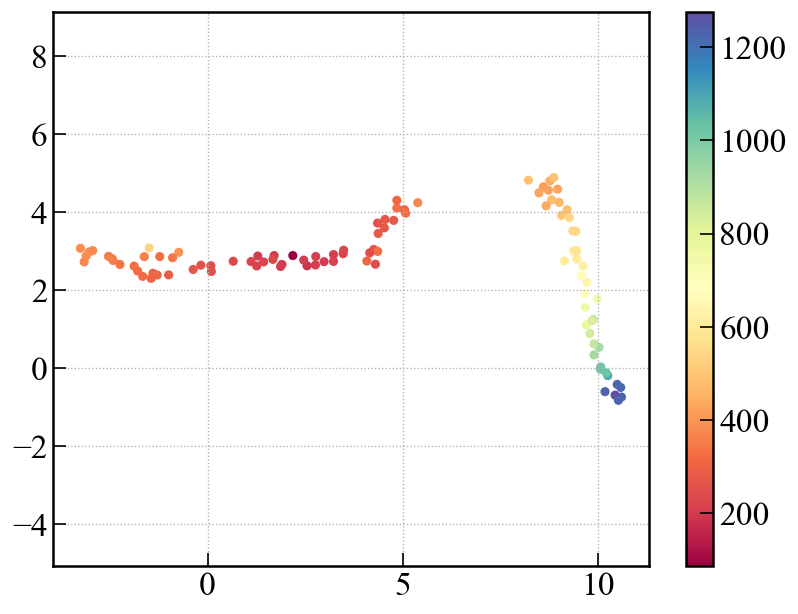

In [80]:
# ユークリッド距離計算
import numpy as np

tid=len(energy)-1 #target index

dist = []
non_sort_dist = []
min_dist = 9999999
for cid in range(max_cid+1):
    _dist = np.linalg.norm(soap_array[tid]-soap_array[cid])
    dist.append([_dist,cid])
    non_sort_dist.append(_dist)
    if min_dist>_dist and _dist>0:
        min_dist = _dist
dist=sorted(dist)

print("energy  distance  cid  energy_difference")
for i in range(len(energy)):
    print(f"{energy[dist[i][1]]:.3f} {dist[i][0]:>5.0f}      {dist[i][1]:>3}  {energy[tid]-energy[dist[i][1]]:>8.5f}")

_dist = []
for cid in range(max_cid+1):
    _dist.append(max(min_dist-100,non_sort_dist[cid]))
plt.scatter(embedding[:, 0], embedding[:, 1], c=_dist, cmap='Spectral', s=20)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()

print("理論構造とのユークリッド距離が最も近い構造")
view(action.get_atoms('opt', cid=dist[1][1]), viewer='x3d')

energy  distance   cid  energy_difference
-3.680  1.0000000  100   0.00000
0.559  0.9969072    0  -4.23874
0.908  0.9958039   93  -4.58764
0.430  0.9957891   15  -4.11011
0.375  0.9941573   23  -4.05518
0.661  0.9932361   95  -4.34070
0.231  0.9931853   39  -3.91062
0.359  0.9925225   20  -4.03890
0.390  0.9924627   55  -4.06970
0.323  0.9924257   52  -4.00300
理論構造とのコサイン距離が最も近い構造


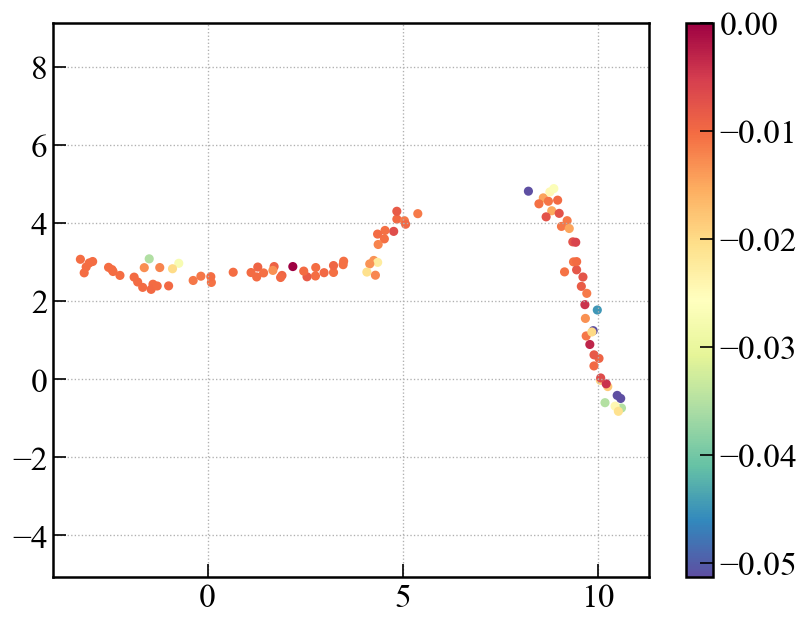

In [81]:
# コサイン距離計算
import math

def cos_sim(p, q):
    return np.dot(p, q) / (np.linalg.norm(p) * np.linalg.norm(q))

dist = []
non_sort_dist = []
min_dist = 9999999
for cid in range(len(soap_array)):
    _dist = 1-cos_sim(soap_array[tid],soap_array[cid])
    dist.append([_dist,cid])
    non_sort_dist.append(_dist)
    if min_dist>_dist and _dist>0:
        min_dist = _dist
dist=sorted(dist)

print("energy  distance   cid  energy_difference")
top_k = min(10, len(dist))
for i in range(top_k):
    print(f"{energy[dist[i][1]]:.3f}  {1-dist[i][0]:>8.7f}  {dist[i][1]:>3}  {energy[tid]-energy[dist[i][1]]:>8.5f}")

_dist = []
for cid in range(max_cid+1):
    # _dist.append(max(math.log(1-non_sort_dist[cid]),-0.02))
    _dist.append(math.log(max(1-non_sort_dist[cid],0.95)))
plt.scatter(embedding[:, 0], embedding[:, 1], c=_dist, cmap='Spectral_r', s=20)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()

print("理論構造とのコサイン距離が最も近い構造")
view(action.get_atoms('opt', cid=dist[1][1]), viewer='x3d')

Text(0.5, 1.0, 'Partial power spectrum of SOAP data')

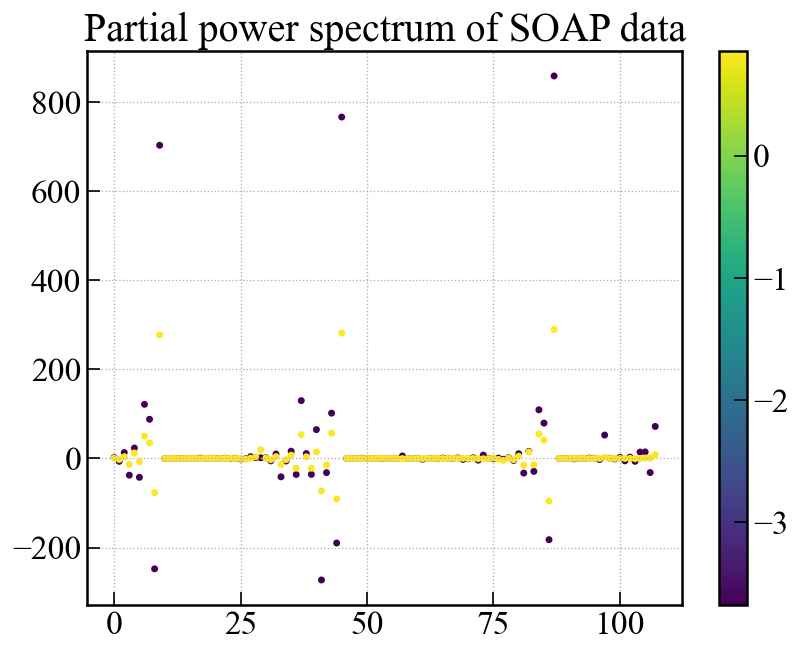

In [82]:
#2構造のSOAP比較
x,y,c=[],[],[]
for cid in [100,8]:
    x.append(range(snum))
    y.append(soap_array[cid])
    c.append([energy[cid]]*snum)
plt.scatter(x, y, c=c, s=10)
# plt.colorbar(boundaries=np.arange(len(space_group_list)+1)-0.5).set_ticks(np.arange(len(space_group_list)))
# plt.colorbar(ticks=mticker.NullLocator())
plt.colorbar()
plt.title('Partial power spectrum of SOAP data')
